In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## Testing with GradientBoost from XGBoost

In [2]:
df = pd.read_csv('../dataset/Australian_Grand_Prix_data.csv')

In [3]:
df

,Driver,Qualifying_Time,Race_Time,Weather_AirTemp,Weather_TrackTemp,Weather_Humidity,Weather_WindSpeed,Weather_Rainfall,Weather_Pressure,team,FP1_total_time,FP2_total_time,FP3_total_time,Year,EventName
0,ALB,75.737,132.195,15.707865,18.942135,78.421348,3.475281,0.325843,1009.901685,Williams,107.037677,100.042091,105.053031,2025,Australian Grand Prix
1,ALB,75.737,142.084,15.707865,18.942135,78.421348,3.475281,0.325843,1009.901685,Williams,107.037677,100.042091,105.053031,2025,Australian Grand Prix
2,ALB,75.737,139.612,15.707865,18.942135,78.421348,3.475281,0.325843,1009.901685,Williams,107.037677,100.042091,105.053031,2025,Australian Grand Prix
3,ALB,75.737,129.065,15.707865,18.942135,78.421348,3.475281,0.325843,1009.901685,Williams,107.037677,100.042091,105.053031,2025,Australian Grand Prix
4,ALB,75.737,98.281,15.707865,18.942135,78.421348,3.475281,0.325843,1009.901685,Williams,107.037677,100.042091,105.053031,2025,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,ZHO,78.540,81.836,17.449550,30.139640,54.157658,1.127027,0.000000,1018.366667,Alfa Romeo,94.751544,98.414645,96.631816,2023,Australian Grand Prix
2697,ZHO,78.540,82.781,17.449550,30.139640,54.157658,1.127027,0.000000,1018.366667,Alfa Romeo,94.751544,98.414645,96.631816,2023,Australian Grand Prix
2698,ZHO,78.540,82.050,17.449550,30.139640,54.157658,1.127027,0.000000,1018.366667,Alfa Romeo,94.751544,98.414645,96.631816,2023,Australian Grand Prix
2699,ZHO,78.540,86.766,17.449550,30.139640,54.157658,1.127027,0.000000,1018.366667,Alfa Romeo,94.751544,98.414645,96.631816,2023,Australian Grand Prix


In [4]:
# Drop rows with 2025 data
df_train = df[df['Year'] < 2025].copy()

# Drop Race_Time column
X = df_train.drop(columns=['Race_Time', 'EventName'])
y = df_train['Race_Time']

categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    X[col] = X[col].astype('category')
    


In [44]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=3, 
    random_state=42, 
    enable_categorical=True,
    early_stopping_rounds=50

)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} seconds")
print(f"MAE: {mae:.4f} seconds")
print(f"R² Score: {r2:.4f}")


[0]	validation_0-rmse:9.62783	validation_1-rmse:7.98219
[10]	validation_0-rmse:9.49381	validation_1-rmse:7.98591
[20]	validation_0-rmse:9.44020	validation_1-rmse:8.02831
[30]	validation_0-rmse:9.41831	validation_1-rmse:8.07045
[40]	validation_0-rmse:9.40899	validation_1-rmse:8.10450
[50]	validation_0-rmse:9.40507	validation_1-rmse:8.12939
[54]	validation_0-rmse:9.40424	validation_1-rmse:8.13701
RMSE: 7.9749 seconds
MAE: 4.9821 seconds
R² Score: -0.0091


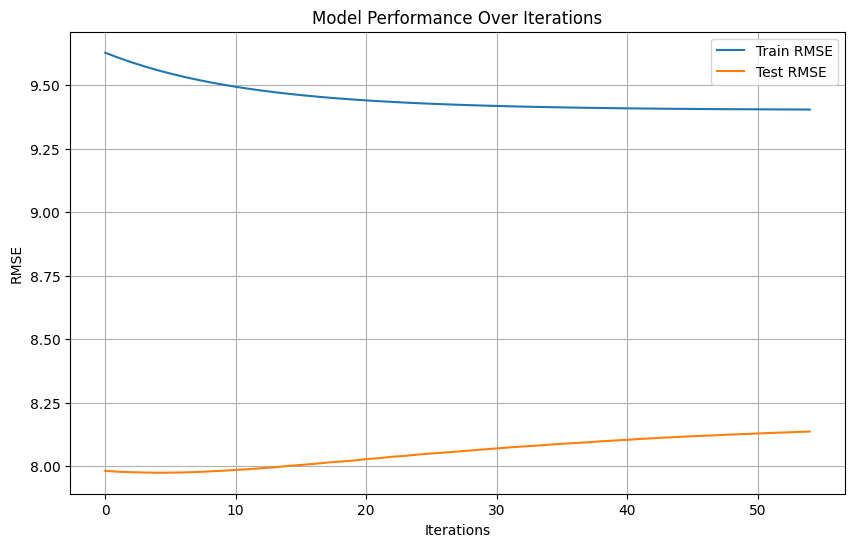

In [45]:
results = model.evals_result()

# Plot training and validation error
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Test RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Model Performance Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Label Encoder for comparison
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_le = X.drop(columns=['FP2_total_time']).copy()
for col in categorical_features:
    X_le[col] = le.fit_transform(X_le[col])

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y, test_size=0.2, random_state=42)

Driver                0
Qualifying_Time       0
Weather_AirTemp       0
Weather_TrackTemp     0
Weather_Humidity      0
Weather_WindSpeed     0
Weather_Rainfall      0
Weather_Pressure      0
team                  0
FP1_total_time        0
FP2_total_time       93
FP3_total_time        0
Year                  0
dtype: int64

In [18]:
# Grandient Boosting Regressor for comparison
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
gbr_model.fit(X_train_le, y_train_le)
y_pred_gbr = gbr_model.predict(X_test_le)
rmse_gbr = np.sqrt(mean_squared_error(y_test_le, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test_le, y_pred_gbr)
r2_gbr = r2_score(y_test_le, y_pred_gbr)
print("\nGradient Boosting Regressor with Label Encoding:")
print(f"RMSE: {rmse_gbr:.4f} seconds")
print(f"MAE: {mae_gbr:.4f} seconds")
print(f"R² Score: {r2_gbr:.4f}")



Gradient Boosting Regressor with Label Encoding:
RMSE: 8.1826 seconds
MAE: 4.9986 seconds
R² Score: -0.0624


In [31]:
results_df = pd.DataFrame({
    'Driver': X_test['Driver'],
    'Actual_Time': y_test,
    'Predicted_Time_XGB': y_pred,
    'Predicted_Time_GBR': y_pred_gbr,
    'Predicted_Time_RF': y_pred_rf
})

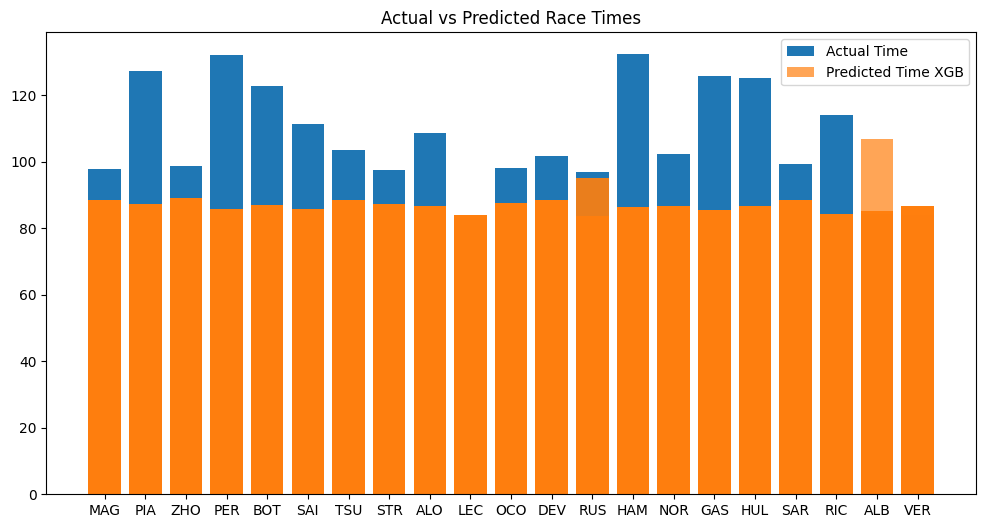

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Driver'], results_df['Actual_Time'], label='Actual Time')
plt.bar(results_df['Driver'], results_df['Predicted_Time_XGB'], alpha=0.7, label='Predicted Time XGB')
plt.title('Actual vs Predicted Race Times')
plt.legend()
plt.show()

In [29]:
# Random Forest Regressor for comparison
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf_model.fit(X_train_le, y_train_le)
y_pred_rf = rf_model.predict(X_test_le)
rmse_rf = np.sqrt(mean_squared_error(y_test_le, y_pred_rf))
mae_rf = mean_absolute_error(y_test_le, y_pred_rf)
r2_rf = r2_score(y_test_le, y_pred_rf)
print("\nRandom Forest Regressor with Label Encoding:")
print(f"RMSE: {rmse_rf:.4f} seconds")
print(f"MAE: {mae_rf:.4f} seconds")
print(f"R² Score: {r2_rf:.4f}")



Random Forest Regressor with Label Encoding:
RMSE: 8.1882 seconds
MAE: 5.0050 seconds
R² Score: -0.0638


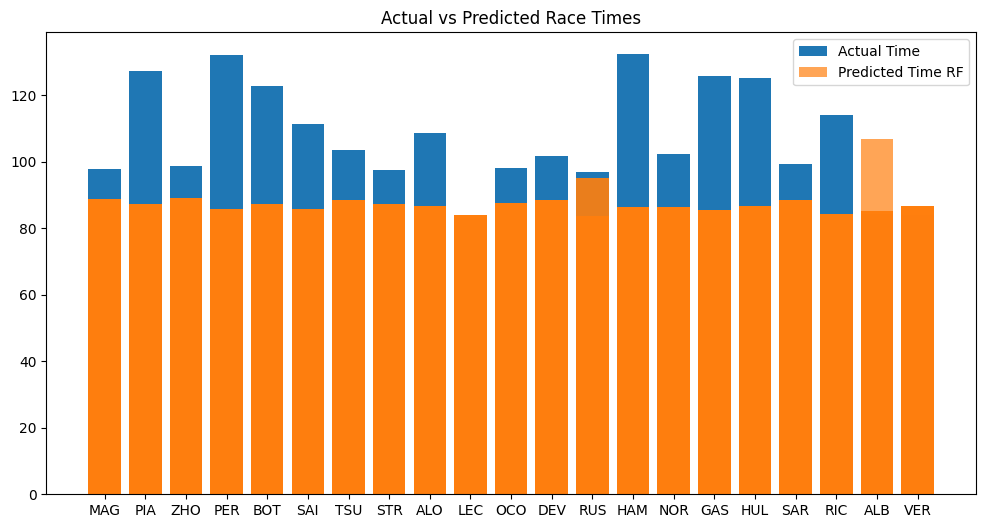

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Driver'], results_df['Actual_Time'], label='Actual Time')
plt.bar(results_df['Driver'], results_df['Predicted_Time_RF'], alpha=0.7, label='Predicted Time RF')
plt.title('Actual vs Predicted Race Times')
plt.legend()
plt.show()



CatBoost Regressor with Categorical Features:
RMSE: 7.9919 seconds
MAE: 4.8297 seconds
R² Score: -0.0135


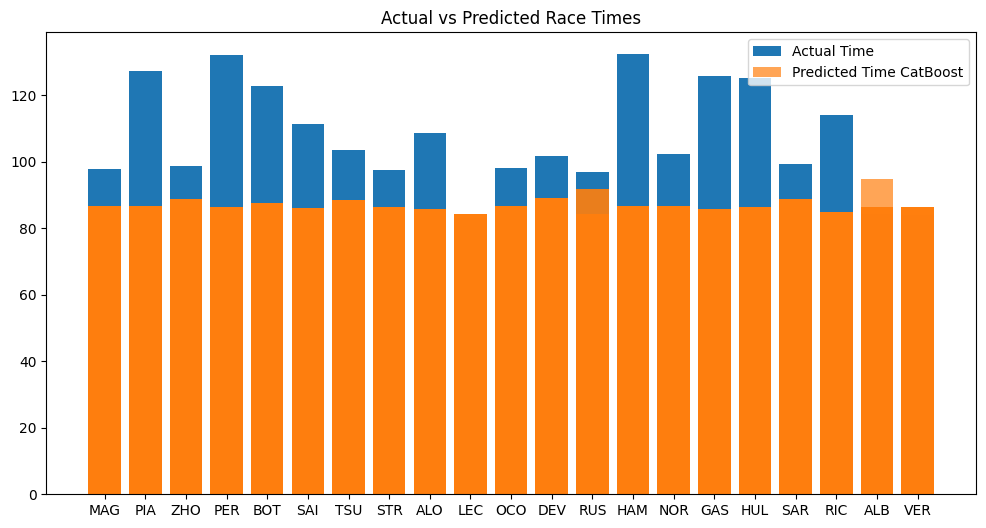

In [36]:
# CatBoost Regressor for comparison
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=3,
    random_seed=42,
    verbose=0,
    cat_features=list(categorical_features)
)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
print("\nCatBoost Regressor with Categorical Features:")
print(f"RMSE: {rmse_cat:.4f} seconds")
print(f"MAE: {mae_cat:.4f} seconds")
print(f"R² Score: {r2_cat:.4f}")
plt.figure(figsize=(12, 6))
plt.bar(results_df['Driver'], results_df['Actual_Time'], label='Actual Time')
plt.bar(results_df['Driver'], y_pred_cat, alpha=0.7, label='Predicted Time CatBoost')
plt.title('Actual vs Predicted Race Times')
plt.legend()
plt.show()